## Analyzing the Stroop Effect

[Stroop Effect](#https://en.wikipedia.org/wiki/Stroop_effect) (from Wikipedia):
>In psychology, the Stroop effect is a demonstration of interference in the reaction time of a task.
When the name of a color (e.g., "blue", "green", or "red") is printed in a color which is not denoted by the name (i.e., the word "red" printed in blue ink instead of red ink), naming the color of the word takes longer and is more prone to errors than when the color of the ink matches the name of the color.

### Dependent and Independent Variables

- Independent variable - condition (congruent (colour and word are congruent) or incongruent (colour and word are incongruent)) 
- Dependent variable - the time it takes for the test taker to name the colours. 

### Hypothesis

We want to prove that there is a difference between the mean time it take for the participant to name all the congruent colours and the mean time it takes to name all the incongruent colours . So our null hypothesis is that the population means are the same: 

$$H_0: \mu_{congruent} - \mu_{incongruent} = 0$$

$$H_1: \mu_{congruent} - \mu_{incongruent} \neq 0$$,

where $\mu_{congruent}$ is the mean of read time of congruent words, $\mu_{incongruent}$ - mean of the read time of incongruent words. 

For this type of hypothesis we will need a **two-tailed test** since we're checking difference in both directions (larger or smaller). Also, we **can't use the test for two independent samples**, because the samples are **dependent**: each row represents an individual taking two different tests. Hence, we need a **paired two-sided t-test**. 

The sample size is vary **small** - just 24 records, so we can't use the main idea of the z-test that for large enough sample (it's not large enough!) the values are distributed normally. That's why we work with Student's distribution and perform a t-test. Also, a **z-test requires that we know the populatinon variance**, which we don't.
However, we assume that the mean of the sample follows the normal distribution. I.e. if we take many samples and calculate their means, their means will be distribute normally. 

### Descriptive Statistics

In [1]:
import pandas as pd 
df = pd.read_csv('stroopdata.csv')

The simplest way to get the idea of the dataset is with the .describe() method. It provides us with the values for the mean (central tendency) and standard deviation (measure of variability). We can also calculate the range and interquartile range (measure of variability) for each category. 

In [2]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


We can also check the median: 

In [3]:
print("Median for congruent words: {}".format(df.Congruent.median()))
print("Median for incongruent words: {}".format(df.Incongruent.median()))

Median for congruent words: 14.3565
Median for incongruent words: 21.0175


Also, we can notice that the standard deviation is higher for incongruent words, which means that there is more variability across the response times for the incongruent words. What about range and interquartile range? 

In [4]:
print("Range for congruent words: {}".format(df.Congruent.max()-df.Congruent.min()))
print("Range for incongruent words: {}".format(df.Incongruent.max()-df.Incongruent.min()))

Range for congruent words: 13.698000000000002
Range for incongruent words: 19.568


In [5]:
print("Interquartile range for congruent words: {}".format(df.Congruent.quantile(q=0.75)-df.Congruent.quantile(q=0.25)))
print("Interquartile range for incongruent words: {}".format(df.Incongruent.quantile(q=0.75)-df.Incongruent.quantile(q=0.25)))

Interquartile range for congruent words: 4.3054999999999986
Interquartile range for incongruent words: 5.33475


The range and interquartile range are wider for the incongruent words. And if we look again at the output of the .describe() method, we will see that the range for the incongruent words overlaps with the range for the congruent words. So we definitely need to perform statistical tests to be able to say that there is a significant difference between the means. 

Another important statistic we need to calculate is the observed difference between the means of our sample:

In [6]:
df.Incongruent.mean()-df.Congruent.mean()

7.9647916666666667

When performing hypothesis testing, we will be checking how likely it is that this value comes from the distribution with 0 mean provided the sample data we have.

### Vizualizations


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

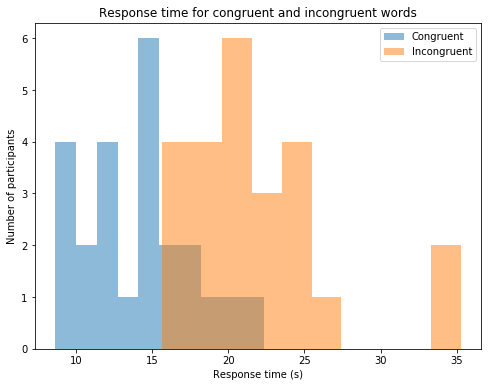

In [8]:
fig = plt.figure(figsize=(8,6));
ax = fig.add_subplot(111);
p1 = ax.hist(df.Congruent, alpha=0.5, label="Congruent");
p2 = ax.hist(df.Incongruent, alpha=0.5, label="Incongruent");
ax.set_title("Response time for congruent and incongruent words");
ax.set_xlabel("Response time (s)")
ax.set_ylabel("Number of participants")
plt.legend()
plt.show()

The visualisation illustrates some of the observations from the previous section: the ranges overlap, and the values for the incongruent words are higher. Also, the visualisation helps us to notice that there are two possible outliers. The simplest test is with Tukey's fences: 

$${\big [}Q_{1}-k(Q_{3}-Q_{1}),Q_{3}+k(Q_{3}-Q_{1}){\big ]}$$

In [9]:
k = 1.5
low = df.Incongruent.min()-k*(df.Incongruent.mean()-df.Incongruent.min())
high = df.Incongruent.mean()+k*(df.Incongruent.mean()-df.Incongruent.min())
low,high

(6.1936250000000044, 31.509291666666662)

In [10]:
df[(df.Incongruent < low) | (df.Incongruent > high)]

,Congruent,Incongruent
14,18.200,35.255
19,12.369,34.288


One guess is that maybe the participants were distracted during the test? Or maybe these two participants are particularly slow? But they were not outliers in the first test - with congruent colours. In this case it's unclear whether they should be excluded from the dataset or not, but we should just know that they are present. So I will create a copy of the dataset without outliers. 

In [11]:
no_outliers = df[(df.Incongruent >= low) & (df.Incongruent <= high)]

Back to visualisations. Even though it was asked for the shape of the distribution, it seems that the best visualisation for this problem might be the box plot because for such a small data set it can capture all the details covered in the descriptive statistics section and detect the outliers automatically using Tuckey's fence:

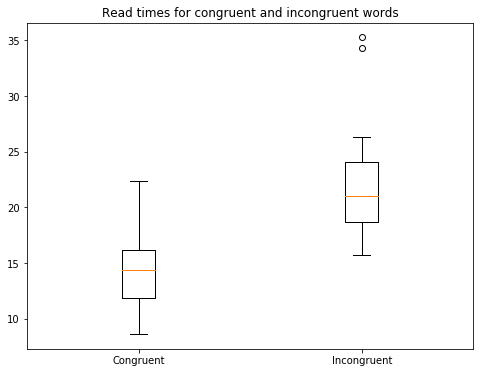

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
p1 = ax.boxplot(df.T, labels=df.columns);#, alpha=0.5);
ax.set_title("Read times for congruent and incongruent words");

The boxplots above show all the details we are interested in: 
- we see that the means are different
- we can notice that the mean for the incongruent words is within the range for congruent words. 
- we can see two potential outliers (that were checked above) 
- we can see that the interquartile range for incongruent words is wider, and if we ingore the outliers, the total range for incongruent words is narrower than for the congruent words

Also, it can be of an interest to plot a histogram of differences between the time since the records are paired and we're calculating this difference for each individual. Also, I decided to make two plots for differences: one with the supposed outliers and one without: 

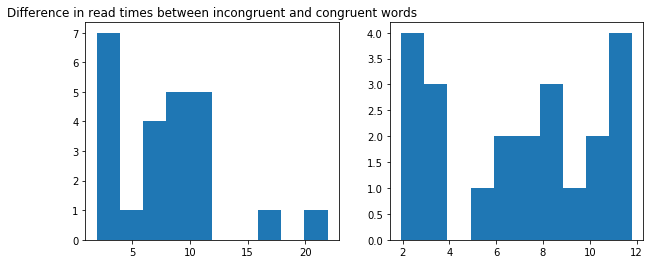

In [13]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax.hist(df.Incongruent-df.Congruent);
ax.set_title("Difference in read times between incongruent and congruent words");
ax2 = fig.add_subplot(122)
ax2.hist(no_outliers.Incongruent-no_outliers.Congruent);

We have quite different shapes, but what's really important here is that there are no negative values at all. For this dataset, for all participants reading incongruent words takes longer. 

### Statistical test

In [14]:
import scipy.stats as stats

There are two ways to test the hypothesis using scipy:  

1) test one sample (difference between two arrays), whether it comes from a distribution with 0 mean (equivalent to $H_0: \mu_{incongruent}-\mu_{congruent}=0$)

2) test two related samples, whether they have the same mean (equivalent to $H_0: \mu_{incongruent} = \mu_{congruent}$)

They should return identical results. For both cases we set the threshold of Type I error $\alpha = 0.05$, which means 95% confidence interval. 

In [15]:
stats.ttest_1samp(df.Incongruent-df.Congruent, 0)

Ttest_1sampResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

In [16]:
stats.ttest_rel(df.Incongruent, df.Congruent)

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

The p-value is very small (well below 0.05), so we can reject the null-hypothesis that the means are equal. This perfectly matches the observations made in the sections for descriptive statistics and visualisations. 
Performing the same t-tests with no_outliers subset, returns similar results, so I'm not including them. 

The t-statistic is 8.020706944109957, which can be equivalently calulated as: 

$$t = \frac{\bar{X} - \mu_0}{\frac{S}{\sqrt{n}}}$$,

where $\bar{X}$ - the mean of the differences, $\mu_0=0$, $S$ - standard deviation of the sample, $n$ - size of the sample. 

In [24]:
sample_mean = (df.Incongruent-df.Congruent).mean()
sample_sd = (df.Incongruent-df.Congruent).std()
n = len(df)

In [25]:
import numpy as np
sample_mean/(sample_sd/np.sqrt(n))

8.020706944109957

Very generally speaking, our null hypothesis is that this statistic follows a t-distribution (and hence the mean is 0) with n − 1 degrees of freedom. In our case, we have 23 degress of freedom (n-1). 

Our confidence level is 95, and so we can find the critical values from the Student's distribution table: $t_{0.95, 23} = 2.069$. It means that our rejection region is: 

$$\text{t-statistic} > 2.069$$. 

8.020706944109957 is well above 2.069, so we can reject the null hypothesis. 

### Possible explanations and other examples

The most interesting and most appealing explanation is that the delay is due to "reduced automatization" (quote from Wikipedia article on the Stroop effect). I.e. when we see a congruent word, we just read, while for the incongruent word requires us to desynchronize the processes and perform describing instead of reading. 

One of the examples with the similar effect is one of the games I saw in a free version of Lumosity. The setting is as follows: 
- if you see green leaves, you should swipe in the direction, where these leaves are **pointing**  
- if you see yellow leaves, you should swipe in the directions, where these leaves are **moving**  

It's often the case that the leaves point left, while moving right and so on, and the colours change often, which confuses the brain even more.

## References

- <a href="https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True">Task Description</a> 
- <a href="https://en.wikipedia.org/wiki/Outlier">Outlier (see Tukey's fences)</a>  
- <a href="https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python#42818547">Side by side plots</a> 
- <a href="https://en.wikipedia.org/wiki/Stroop_effect"> Stroop Effect</a> 
- <a href="https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values">T-Distribution. Table of Selected Values</a>  
- <a href="https://en.wikipedia.org/wiki/Student%27s_t-test">t-test</a>
- <a href="https://newonlinecourses.science.psu.edu/stat500/node/51/">Comparing Two Population Means: Paired Data</a> 
- <a href="https://en.wikipedia.org/wiki/Z-test">z-test</a>

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TheStroopEffect.ipynb'])

0